# Guided Projects Artificial Intelligence & Machine Learning
## Guided Projects: Unsupervised Learning
### Human Activity Recognition from Smart Phone Data
Recognizing human activities from temporal streams of sensory data observations is a 
very important task on a wide variety of applications in context recognition. Human activities 
are hierarchical in nature, i.e. the complex activities can be decomposed to several simpler 
ones. Human activity recognition is the problem of classifying sequences of accelerometer
data recorded by pre-installed sensors in smart phones into known well-defined 
movements to make it ready for predictive modelling.
### Question:
Perform activity recognition on the dataset using a hidden markov model. Then perform the 
same task using a different classification algorithm (logistic regression/decision tree) of your 
choice and compare the performance of the two algorithms

Dataset Link: Human Activity Recognition with Smartphones
https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, accuracy_score
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from hmmlearn import hmm

In [162]:
# Load the datasets
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')


In [164]:
train['Activity'].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [165]:
train.columns, test.columns

(Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X',
        ...
        'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
        'angle(tBodyAccJerkMean),gravityMean)',
        'angle(tBodyGyroMean,gravityMean)',
        'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
        'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
       dtype='object', length=563),
 Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
        'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
        'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
        'tBodyAcc-max()-X',
        ...
        'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
        'angle(tBodyAccJerkMean),gravityMean)',
        'angle(tBodyGyroMean,g

In [166]:
train.isna().sum()

tBodyAcc-mean()-X       0
tBodyAcc-mean()-Y       0
tBodyAcc-mean()-Z       0
tBodyAcc-std()-X        0
tBodyAcc-std()-Y        0
                       ..
angle(X,gravityMean)    0
angle(Y,gravityMean)    0
angle(Z,gravityMean)    0
subject                 0
Activity                0
Length: 563, dtype: int64

In [167]:
# X and y
x_train = train.iloc[:,:-1].values
x_test = test.iloc[:,:-1].values
y_train = train['Activity']
y_test = test['Activity']
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7352, 562), (2947, 562), (7352,), (2947,))

In [168]:
cov = np.cov(x_train, rowvar = False)
cov.shape

(562, 562)

In [169]:
y_train.value_counts(), y_test.value_counts()

(LAYING                1407
 STANDING              1374
 SITTING               1286
 WALKING               1226
 WALKING_UPSTAIRS      1073
 WALKING_DOWNSTAIRS     986
 Name: Activity, dtype: int64,
 LAYING                537
 STANDING              532
 WALKING               496
 SITTING               491
 WALKING_UPSTAIRS      471
 WALKING_DOWNSTAIRS    420
 Name: Activity, dtype: int64)

In [170]:
pca = PCA(n_components = 0.98)
x_train_d = pca.fit_transform(x_train)
x_test_d = pca.fit_transform(x_test)
x_train_d.shape, x_test_d.shape

((7352, 69), (2947, 78))

In [171]:
# Number of components used from above
pca = PCA(n_components = 80)
fit = pca.fit(x_train)

In [172]:
x_train_d = fit.transform(x_train)
x_test_d = fit.transform(x_test)
x_train_d.shape, x_test_d.shape

((7352, 80), (2947, 80))

In [173]:
# Hidden Markov Model
hmm_train = pd.DataFrame(x_train_d)
hmm_train['Activity'] = train['Activity']
hmm_test = pd.DataFrame(x_test_d)
hmm_test['Activity'] = test['Activity']

In [174]:
hmm_train_STAND = hmm_train[hmm_train['Activity']=='STANDING']
hmm_train_SIT = hmm_train[hmm_train['Activity']=='SITTING']
hmm_train_LAY = hmm_train[hmm_train['Activity']=='LAYING']
hmm_train_WALK = hmm_train[hmm_train['Activity']=='WALKING']
hmm_train_WALKD = hmm_train[hmm_train['Activity']=='WALKING_DOWNSTAIRS']
hmm_train_WALKU = hmm_train[hmm_train['Activity']=='WALKING_UPSTAIRS']

In [175]:
# Calculate true labels
labels_true = []
for i in range(len(hmm_train)):
    if (hmm_train['Activity'].iloc[i]=='STANDING'):
        labels_true.append(0)
    elif (hmm_train['Activity'].iloc[i]=='SITTING'):
        labels_true.append(1)
    elif (hmm_train['Activity'].iloc[i]=='LAYING'):
        labels_true.append(2)
    elif (hmm_train['Activity'].iloc[i]=='WALKING'):
        labels_true.append(3)
    elif (hmm_train['Activity'].iloc[i]=='WALKING_DOWNSTAIRS'):
        labels_true.append(4)
    else:
        labels_true.append(5)
labels_true = np.array(labels_true)
labels_true.shape

(7352,)

In [176]:
# Calculate true labels
labels_test = []
for j in range(len(hmm_test)):
    if (hmm_test['Activity'].iloc[j]=='STANDING'):
        labels_test.append(0)
    elif (hmm_test['Activity'].iloc[j]=='SITTING'):
        labels_test.append(1)
    elif (hmm_test['Activity'].iloc[j]=='LAYING'):
        labels_test.append(2)
    elif (hmm_test['Activity'].iloc[j]=='WALKING'):
        labels_test.append(3)
    elif (hmm_test['Activity'].iloc[j]=='WALKING_DOWNSTAIRS'):
        labels_test.append(4)
    else:
        labels_test.append(5)
labels_test = np.array(labels_test)
labels_test.shape

(2947,)

In [95]:
# Implementing HMM
# Fitting for each activity
def HMM_F1score(N,M,labels_true):
    hmm_stand = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_sit = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_lay = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk_d = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    hmm_walk_u = hmm.GMMHMM(n_components = N, n_mix = M, covariance_type = 'diag')
    
    hmm_stand.fit(hmm_train_STAND.iloc[:,0:80].values)
    hmm_sit.fit(hmm_train_SIT.iloc[:,0:80].values)
    hmm_lay.fit(hmm_train_LAY.iloc[:,0:80].values)
    hmm_walk.fit(hmm_train_WALK.iloc[:,0:80].values)
    hmm_walk_d.fit(hmm_train_WALKD.iloc[:,0:80].values)
    hmm_walk_u.fit(hmm_train_WALKU.iloc[:,0:80].values)
    
    # Calculating F1_Score
    labels_predict = []
    for i in range(len(hmm_test)):
        log_likelihood_value = np.array([hmm_stand.score(hmm_test.iloc[i,0:80].values.reshape(1,80)),
                                        hmm_sit.score(hmm_test.iloc[i,0:80].values.reshape(1,80)),
                                        hmm_lay.score(hmm_test.iloc[i,0:80].values.reshape(1,80)),
                                        hmm_walk.score(hmm_test.iloc[i,0:80].values.reshape(1,80)),
                                        hmm_walk_d.score(hmm_test.iloc[i,0:80].values.reshape(1,80)),
                                        hmm_walk_u.score(hmm_test.iloc[i,0:80].values.reshape(1,80))])
        labels_predict.append(np.argmax(log_likelihood_value))
    labels_predict = np.array(labels_predict)
    
    F1 = f1_score(labels_true, labels_predict, average = 'micro')
    acc = accuracy_score(labels_true, labels_predict)
    return F1,acc

In [177]:
states = np.arange(1,36,1)
states

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35])

HMM has been trained for 1 states
HMM has been trained for 2 states
HMM has been trained for 3 states
HMM has been trained for 4 states
HMM has been trained for 5 states
HMM has been trained for 6 states
HMM has been trained for 7 states
HMM has been trained for 8 states
HMM has been trained for 9 states
HMM has been trained for 10 states
HMM has been trained for 11 states
HMM has been trained for 12 states
HMM has been trained for 13 states
HMM has been trained for 14 states
HMM has been trained for 15 states
HMM has been trained for 16 states
HMM has been trained for 17 states
HMM has been trained for 18 states
HMM has been trained for 19 states
HMM has been trained for 20 states
HMM has been trained for 21 states
HMM has been trained for 22 states
HMM has been trained for 23 states
HMM has been trained for 24 states
HMM has been trained for 25 states
HMM has been trained for 26 states
HMM has been trained for 27 states
HMM has been trained for 28 states
HMM has been trained for 29 s

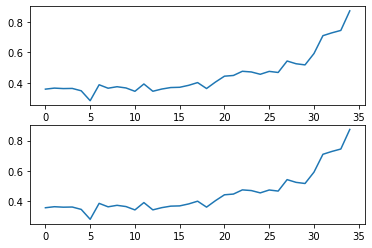

In [120]:
F1_value_states = []
acc_value_states = []
for i in states:
    print("HMM has been trained for {} states".format(i))
    f1,acc = HMM_F1score(i,1,labels_test)
    F1_value_states.append(f1)
    acc_value_states.append(acc)
fig, ax = plt.subplots(2,1)

ax[0].plot(np.flip(F1_value_states))
ax[1].plot(np.flip(acc_value_states))

plt.show()

In [178]:
score = pd.DataFrame([np.array(F1_value_states), np.array(acc_value_states)])
score

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.873431,0.744825,0.728877,0.710214,0.592806,0.518154,0.525619,0.543604,0.468273,0.475399,...,0.366474,0.374618,0.364778,0.387513,0.28266,0.347811,0.36342,0.362402,0.365456,0.35867
1,0.873431,0.744825,0.728877,0.710214,0.592806,0.518154,0.525619,0.543604,0.468273,0.475399,...,0.366474,0.374618,0.364778,0.387513,0.28266,0.347811,0.36342,0.362402,0.365456,0.35867


#### Prediction using Neural Network

In [179]:
# encode class values as integers

encoder = LabelEncoder()
encoder.fit(y_train)
encoded_y_train = encoder.transform(y_train)
encoded_y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_y_train)
dummy_y_test = np_utils.to_categorical(encoded_y_test)

In [180]:
print(encoded_y_train.shape, encoded_y_test.shape)
encoded_y_train, encoded_y_test

(7352,) (2947,)


(array([2, 2, 2, ..., 5, 5, 5]), array([2, 2, 2, ..., 5, 5, 5]))

In [181]:
dummy_y_train[:5], dummy_y_test[1000:1005]

(array([[0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0.]], dtype=float32))

In [183]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(128, input_shape = (80,), activation='relu'))
    model.add(Dense(6, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [184]:
model = baseline_model()

In [188]:
model.fit(x_train_d, dummy_y_train, batch_size = 256, epochs = 20, verbose = 1)

Epoch 1/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0570 - accuracy: 0.9850
Epoch 2/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0550 - accuracy: 0.9859
Epoch 3/20
29/29 [==============================] - 0s 17ms/step - loss: 0.0529 - accuracy: 0.9859
Epoch 4/20
29/29 [==============================] - 0s 14ms/step - loss: 0.0511 - accuracy: 0.9865
Epoch 5/20
29/29 [==============================] - 0s 14ms/step - loss: 0.0493 - accuracy: 0.9871
Epoch 6/20
29/29 [==============================] - 0s 12ms/step - loss: 0.0482 - accuracy: 0.9872
Epoch 7/20
29/29 [==============================] - 1s 20ms/step - loss: 0.0466 - accuracy: 0.9869
Epoch 8/20
29/29 [==============================] - 0s 17ms/step - loss: 0.0451 - accuracy: 0.9882
Epoch 9/20
29/29 [==============================] - 0s 15ms/step - loss: 0.0436 - accuracy: 0.9887
Epoch 10/20
29/29 [==============================] - 1s 24ms/step - loss: 0.0428 - accuracy: 0.9888
Epoch 11/

In [189]:
y_pred = np.round(model.predict(x_test_d))
y_pred

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [190]:
from sklearn.metrics import classification_report
target_names = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
print(classification_report(dummy_y_test, y_pred, target_names = target_names))

                    precision    recall  f1-score   support

            LAYING       1.00      0.97      0.98       537
           SITTING       0.95      0.84      0.89       491
          STANDING       0.85      0.95      0.90       532
           WALKING       0.90      0.98      0.94       496
WALKING_DOWNSTAIRS       0.97      0.97      0.97       420
  WALKING_UPSTAIRS       0.97      0.86      0.91       471

         micro avg       0.93      0.93      0.93      2947
         macro avg       0.94      0.93      0.93      2947
      weighted avg       0.94      0.93      0.93      2947
       samples avg       0.93      0.93      0.93      2947

